In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 統計量的抽樣分布

### 中央極限定理

In [9]:
# 讀取資料集
loans_income = pd.read_csv('../../data/loans_income.csv')
loans_income = loans_income['x']
loans_income.head()

0     67000
1     52000
2    100000
3     78762
4     37041
Name: x, dtype: int64

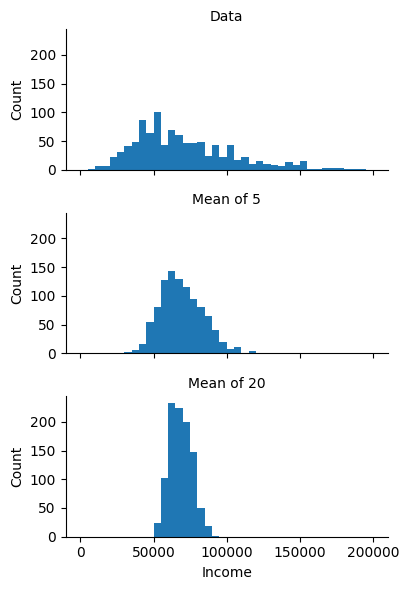

In [14]:
# 中央極限定理
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': ['Data'] * 1000
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': ['Mean of 5'] * 1000
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': ['Mean of 20'] * 1000
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}');

## 自助法

In [16]:
from sklearn.utils import resample
# 使用scikit learn 的自助法
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'boas: {results.mean() - loans_income.median()}')
print(f'std.error: {results.std()}')


Bootstrap Statistics:
original: 62000.0
boas: -93.3234999999986
std.error: 250.52373488252462


## 常態分布

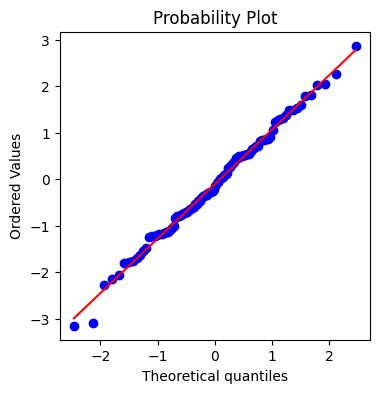

In [2]:
# 繪製QQ圖
from scipy import stats
fig, ax = plt.subplots(figsize=(4, 4))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax);

## 長尾分布

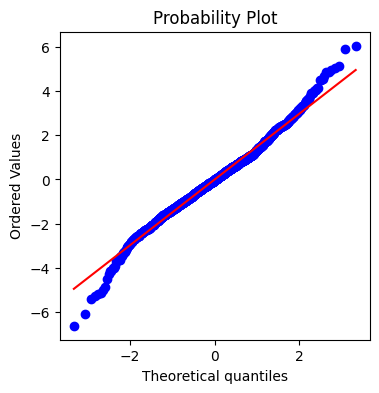

In [ ]:
# 長尾效應
sp500_px = pd.read_csv('../../data/sp500_data.csv')
nflx= sp500_px.NFLX
# 對數報酬率
nflx = np.diff(np.log(nflx[nflx>0]))
fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax);

## 二項分布

In [10]:
# 二項分布的機率 剛好發生 x 次成功的機率
print(stats.binom.pmf(0, n=200, p=0.02))

# 最多發生 k 次成功的總機率 例如1次成功 會累積1次以下的機率
print(stats.binom.cdf(1, n=200, p=0.02))

0.017587946605721567
0.08937548377193147


## 泊松分布及其相關分布

### 泊松分布

In [11]:
# 平均每分鐘2次客戶打進來 模擬100分鐘的狀況
stats.poisson.rvs(2, size=100)

array([2, 3, 4, 0, 1, 0, 0, 2, 2, 1, 2, 6, 2, 3, 3, 2, 2, 1, 4, 1, 3, 1,
       3, 1, 4, 0, 4, 1, 3, 4, 1, 1, 1, 1, 0, 2, 1, 1, 4, 3, 2, 1, 2, 3,
       0, 2, 2, 3, 1, 3, 1, 0, 1, 3, 3, 0, 0, 2, 3, 2, 1, 3, 2, 3, 2, 2,
       3, 1, 2, 4, 3, 3, 4, 2, 2, 5, 3, 5, 4, 2, 1, 3, 3, 3, 0, 1, 4, 2,
       2, 2, 2, 1, 5, 2, 1, 2, 1, 2, 2, 3])

### 指數分布

In [17]:
# 平均每分鐘2次客戶打進來 模擬100次電話的間隔時間
stats.expon.rvs(scale=1/2, size=100)

array([0.70460164, 0.22777011, 0.92402141, 0.0057574 , 0.13316373,
       0.10449807, 0.05755506, 0.34547736, 0.58041247, 0.00359309,
       0.13309576, 0.0831999 , 0.36030906, 0.66598317, 0.14239191,
       0.21233741, 0.89352599, 1.06016358, 0.14167796, 0.01254071,
       0.23606148, 0.01723727, 0.09866079, 0.37985947, 0.08118774,
       0.02338617, 0.340924  , 0.2112468 , 0.77609879, 0.35472157,
       0.56686786, 0.15934725, 0.19433197, 0.12557246, 1.07271826,
       1.39385847, 0.31513892, 0.74812809, 0.88263135, 0.37983393,
       0.02411614, 0.28612482, 0.93687919, 0.49340246, 0.08337883,
       0.20317073, 0.31913832, 0.26732587, 0.88572002, 1.71635908,
       0.33179463, 0.0284516 , 0.23935312, 0.18864341, 0.01497894,
       0.87657616, 0.81905545, 0.17290795, 0.1176185 , 0.21691903,
       0.10244014, 0.08157818, 0.04189173, 1.37049635, 2.26622313,
       0.88668256, 1.69238596, 0.20757695, 0.25004995, 0.42361604,
       2.4613206 , 0.21223621, 0.45699573, 0.24247083, 0.64061

### 韋伯分布

In [18]:
# 假設一個平均壽命為5000小時的電器 且會隨著時間故障率增加
stats.weibull_min.rvs(1.5, scale=5000, size=100)

array([ 6858.92673868,  4811.40842593,  6394.5615821 ,   610.63654537,
        1557.27716784,  2653.0723592 ,  4218.12347227,  2455.07097237,
        3047.59266703,  2281.34693839, 10849.63266223,  2000.33968825,
        1768.21634046,  5915.18524811,   207.36730326,  6597.04503305,
        1942.95909351,  4921.87625148,  9052.15153425,  4685.86217118,
        1215.01815697,  7911.70348113,  3460.98938809,  1255.73305103,
        6152.43501652,  6117.24320113,  1981.40990133,  2771.10950711,
        4961.54092686,  2194.29070245,  8319.60741966,  4114.22922831,
        2035.75827232,  9196.28015302,  4154.53305901,  2661.27378411,
         726.89188884,  9462.57364523,  7487.9291842 ,  5814.76185895,
        3074.61610902,  1934.14487747,  1100.31964332, 11530.44487887,
        5221.85597442,   654.78331209,  4236.68299582,  4324.85771931,
        5674.34423789,   559.56515032,  4885.79573833,  2621.94436808,
         247.54297781,  5397.4296806 ,  1376.39464437,  6394.53313212,
      